<H2 style="color:blue;font-size:20px;"align="right">فاطمه شاه حسینی</H2>
 
 <H2 style="color:blue;font-size:20px;"align="right"> 810199440 </H2>
 <H2 style="color:blue;font-size:20px;"align="right"> (Naive Bayes Classifier)  تمرین کامپیوتری شماره سه </H2>
 <H2 style="color:green;font-size:20px;"align="right"> هدف: </H2>
 <H2 style="color:black;font-size:15px;"align="right">  طبقه یندی داده های یک دیتابیس بر اساس فیچر های داده های ترین برای پیش بینی داده های تست </H2>
 <H2 style="color:green;font-size:20px;"align="right"> توضیح کلی پروژه: </H2>
 <H2 style="color:black;font-size:15px;"align="right">  ایتدا داده های ترین را پیش پردازش می کنیم و بعد با استفاده از قانون بیز، تست ها را بر اساس فیچر هایی که در انها می بینیم و تطابق با دیتا ست قبلی پیش بینی می کنیم. برای محاسبه لایکلی هود از دو الگوریتم گاوسی و برنولی استفاده می کنیم </H2>
<H1 style="color:red;font-size:15px;"align="right">1- Preprocess<H1>
<H2 style="color:green;font-size:20px;"align="right"> مجموعه داده را با چه نسبتی بین ترین و تست تقسیم کردید ؟ چرا؟ </H2>
<H2 style="color:black;font-size:15px;"align="right"> صد به 5900، چون به مقدار بیشتری داده ترین نیاز داریم و همچنین100 داده تست تا همه انواغ کلاس را پوشش دهد. <H2>


In [1]:
import pickle
import matplotlib.pyplot as plt
import random
from skimage.transform import resize
import numpy as np
import statistics
import math

In [2]:
pkl_file = open('Datasets/data.pkl', 'rb')
data = pickle.load(pkl_file)

pkl_file2 = open('Datasets/label.pkl', 'rb')
label = pickle.load(pkl_file2)

temp = list(zip(data, label))
random.shuffle(temp)
data, label = zip(*temp)
data = list(data)
label = list(label)

<H1 style="color:red;font-size:15px;"align="right">2- <H1>
<H2 style="color:green;font-size:20px;"align="right">یک نمونه از دیتای ترین را بررسی کنید و بگویید پیکسل ها در چه محدوده ای هستند؟ </H2>
<H2 style="color:black;font-size:15px;"align="right">هر یک از پیکسل ها می تواند 0 یا 255 باشد <H2>

[[  0   0   0   0 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255 255   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0
    0   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255   0   0
    0   0   0   0   0]
 [  0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
    0   0   0   0   0]
 [  0   0   0 255 255 255 255 

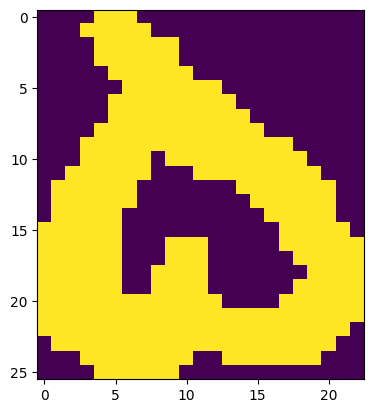

In [3]:
index = random.randrange(len(data)-1)
image = data[index]
print(image)
print("image shows: ", label[index])

fig, ax =  plt.subplots()
ax.imshow(image)
plt.show()

<H1 style="color:red;font-size:15px;"align="right">3- Resizing <H1>

[[0.00000000e+00 0.00000000e+00 5.62500001e-02 5.96250000e-01
  1.00000000e+00 1.00000000e+00 1.71250000e-01 3.35044715e-11
  2.42907419e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.06250000e-01 7.86250000e-01
  1.00000000e+00 1.00000000e+00 1.00000000e+00 4.50000000e-01
  3.26250000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.09402947e-11 5.25000000e-01
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  7.25000000e-01 9.63253556e-11 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11402368e-10
  6.4

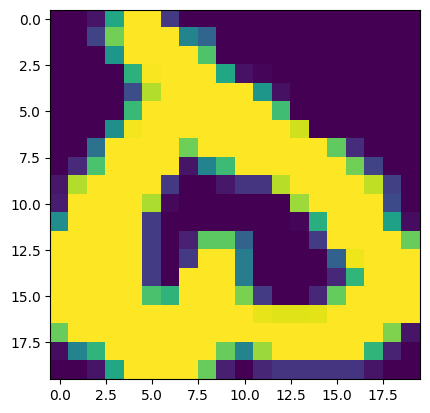

In [4]:
image_2020 = resize(image, (20, 20), anti_aliasing=True)
print(image_2020)
fig, ax =  plt.subplots()
ax.imshow(image_2020)
plt.show()

<H2 style="color:green;font-size:20px;"align="right">چرا باید قبل بررسی تصاویر سایز آنها را یکسان سازی کنیم؟ </H2>
<H2 style="color:black;font-size:15px;"align="right">چون هر کدام از نمونه ها آرایه های دوبعدی هستند که سایزهای مختلفی دارند و تا وقتی همه نمونه ها در رنج مشخصی پیکسل نداشته باشند، نمی توان آنها را با هم مقایسه و طبقه بندی کرد <H2>

In [5]:
for index in range(len(data)):
    data[index] = resize(data[index], (20, 20), anti_aliasing=True) 

<H1 style="color:red;font-size:15px;"align="right">4-  </H1>
<H2 style="color:green;font-size:20px;"align="right">از هر کلاس یک نمونه دلخواه را به همراه نوع آن نمایش دهید. </H2>

In [6]:
train_len = 5900
train_data = data[0:train_len]
train_label = label[0:train_len]

test_data = data[train_len :]
test_label = label[train_len :]

In [7]:
sampelsByLabel = [[], [], [], [], [], [], [], [], [], []]
sampelsByLabelTest = [[], [], [], [], [], [], [], [], [], []]

for i in range(train_len):
    lbl = train_label[i]
    sampelsByLabel[lbl].append(train_data[i])

In [8]:
for j in range(len(data) - train_len):
    lbl = test_label[j]
    sampelsByLabelTest[lbl].append(test_data[j])

class:  0


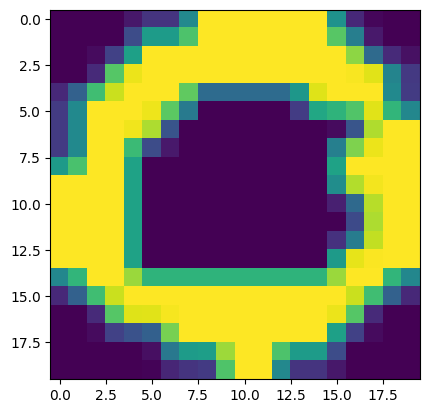

class:  1


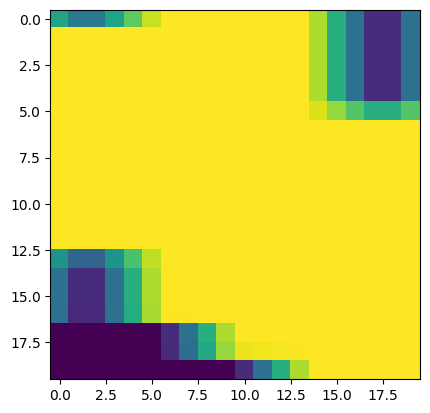

class:  2


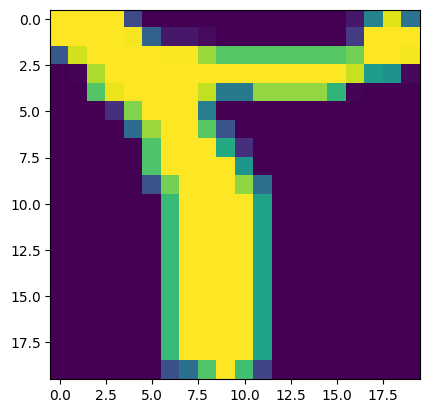

class:  3


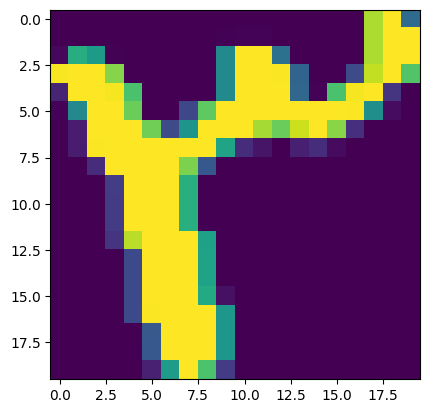

class:  4


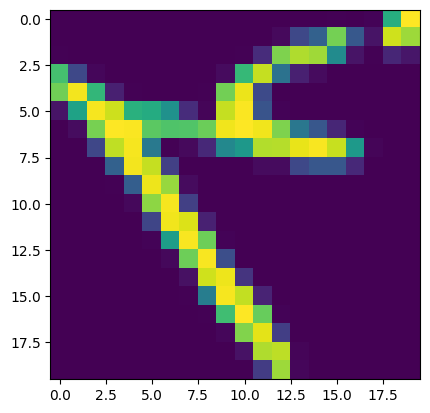

class:  5


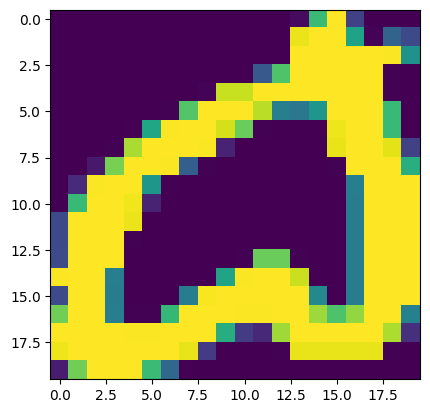

class:  6


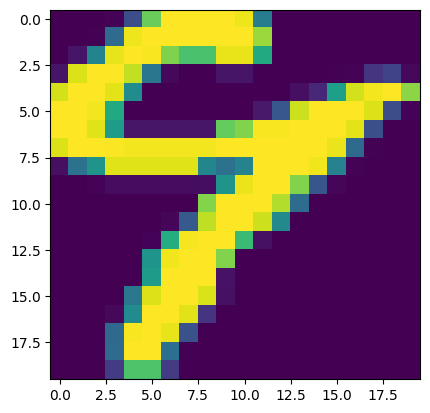

class:  7


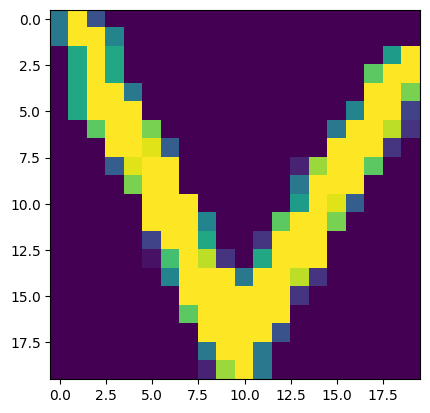

class:  8


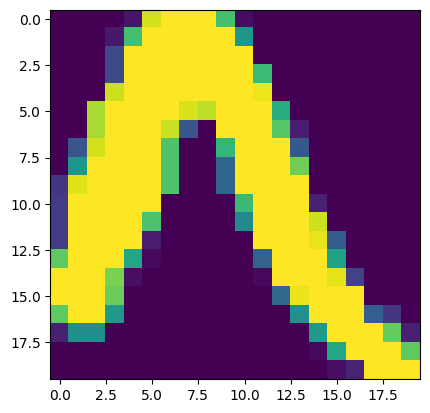

class:  9


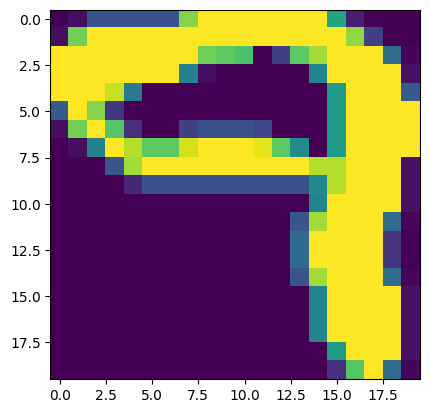

In [9]:
for i in range(0,10):
    img = sampelsByLabel[i][0]
    print("class: ", i)
    fig, ax =  plt.subplots()
    ax.imshow(img)
    plt.show()

<H1 style="color:red;font-size:15px;"align="right">5-  <H1>
<H2 style="color:green;font-size:20px;"align="right">نمودار میله ای تعداد نمونه های هر کلاس در آرایه تست و ترین را بکشید. </H2>

In [10]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [len(sampelsByLabel[i]) for i in x]

# Class Proior Probabilities
Pc = [yi / len(data) for yi in y]

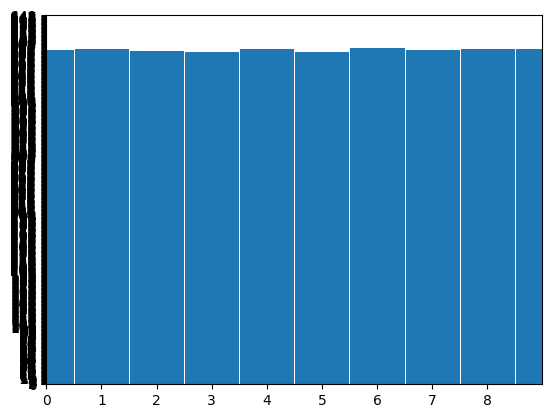

In [11]:
# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 9), xticks=np.arange(0, 9),
       ylim=(0, 650), yticks=np.arange(0, 650))

plt.show()

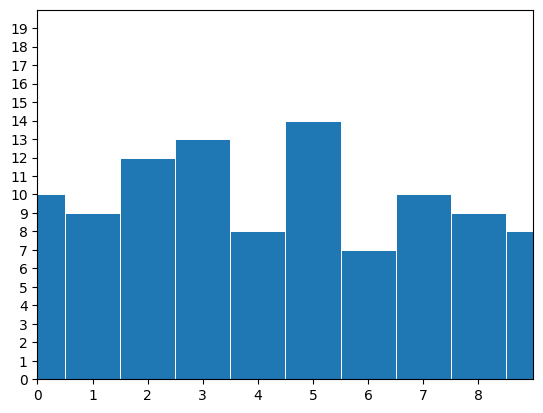

In [12]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [len(sampelsByLabelTest[i]) for i in x]

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 9), xticks=np.arange(0, 9),
       ylim=(0, 20), yticks=np.arange(0, 20))

plt.show()

<H1 style="color:red;font-size:15px;"align="right">6-  <H1>
<H2 style="color:green;font-size:20px;"align="right">اگر داده ها را قبل از دادن به الگوریتم بیز اسکیل نکنیم، چه اتفاقی می افتد ؟ </H2>
<H2 style="color:black;font-size:15px;"align="right"> ترین به درستی اتفاق نمی افتد  </H2>

In [13]:
img = train_data[600]
max = np.amax(img)
min = np.amin(img)
print(min, max)
print(len(img), len(img[0]))

0.0 1.0
20 20


<H1 style="color:red;font-size:20px;"align="right">فرایند مساله <H1>
<H2 style="color:green;font-size:15px;"align="right">Posterior probability: </H2>
<H2 style="color:black;font-size:15px;"align="right"> اگر پیکسل های یک تصویر را داریم (ایکس)، با چه احتمالی، تصویرعدد (سی) است </H2>
<H2 style="color:green;font-size:15px;"align="right">Likelihood: </H2>
<H2 style="color:black;font-size:15px;"align="right">   درچند درصد مواقع در عدد سی که داریم، پیکسل ایکس روشن است؟ این احتمال را به کمک الگوریتم های گوسی و برنولی در بخش بعدی محاسبه می کنیم</H2>
<H2 style="color:green;font-size:15px;"align="right">Class Prior probability:  </H2>
<H2 style="color:black;font-size:15px;"align="right"> احتمال اینکه عدد روی تصویر ، سی باشد چقدر است؟ این مقدار را هنگام رسم نمودار میله ای نسبت وجود هر عدد به کل اعداد دیده شده، حساب کرده ایم </H2>
<H2 style="color:green;font-size:15px;"align="right">Pridictor Prior Probability:  </H2>
<H2 style="color:black;font-size:15px;"align="right"> احتمال اینکه پیکسل های ایکس روشن باشند </H2>
<H2 style="color:black;font-size:15px;"align="right"> 
در کل قضیه بیز، میزان باور ما نسبت به یک پدیده را قبل و بعد از مشاهده شواهدی در تایید یا انکار آن پدیده به هم پیوند میزند</H2>

<img src="bayes.png" width="500" height="600">

<H1 style="color:red;font-size:20px;"align="right">Gaussian Naive Bayes <H1>
<img src="gausian.png" width="500" height="600">                                         

In [14]:
def calc_gaussian_bayes(arr, test_data, AS):
    mean = sum(arr) / len(arr)
    if AS:
        variance = statistics.variance(arr) + 0.00001  # Additive Smoothing
    else:
        variance = statistics.variance(arr)
    return ( 1 / math.sqrt(2 * math.pi * variance)  )  *  math.exp( pow((test_data  - mean), 2) / (-2 * variance) )

<H1 style="color:red;font-size:20px;"align="right">Bernoulli Naive Bayes<H1>
<img src="bern.png" width="500" height="600">                                         

In [15]:
def calc_bernoulli_bayes(train_arr, test_data, threshold, AS):
    if AS:
        black_num ,white_num = 1, 1 # Additive Smoothing
        length = len(train_arr) + 1
    else:
        black_num ,white_num = 0, 0
        length = len(train_arr)
        
    for d in train_arr:
        if d > threshold:
            black_num += 1
        else:
            white_num += 1
    if test_data > threshold:
        return black_num / length 
    else:
        return white_num / length 

In [16]:
def calc_likelihood(sampels, test, mode, AS):
    mult = 1
    threshold = 0.5
    for i in range(20):
        for j in range(20):
            ij_cells = [sampel[i][j] for sampel in sampels]
            if mode == "gaussian":
                prob = calc_gaussian_bayes(ij_cells, test[i][j], AS)
            elif mode == "bernoulli":
                prob = calc_bernoulli_bayes(ij_cells, test[i][j], threshold, AS)
            mult *=  prob
    return mult

In [ ]:
#gaussian

for t in range(len(test_data)):
    print("--- Test#", t, "---")
    print("Real Label: ", test_label[t])
    test = test_data[t]
    posterior_prob = [1] * 10

    for clas in range(10): 
        sampels = sampelsByLabel[clas]
        posterior_prob[clas] =  calc_likelihood(sampels, test, "gaussian", 1) * Pc[clas]
        
    print("Found Label: ", np.argmax(posterior_prob))

--- Test# 0 ---
Real Label:  3
Found Label:  3
--- Test# 1 ---
Real Label:  8
Found Label:  8
--- Test# 2 ---
Real Label:  8
Found Label:  8
--- Test# 3 ---
Real Label:  2
Found Label:  2
--- Test# 4 ---
Real Label:  3
Found Label:  3
--- Test# 5 ---
Real Label:  7
Found Label:  7
--- Test# 6 ---
Real Label:  3
Found Label:  3
--- Test# 7 ---
Real Label:  5
Found Label:  5
--- Test# 8 ---
Real Label:  2
Found Label:  3
--- Test# 9 ---
Real Label:  3
Found Label:  3
--- Test# 10 ---
Real Label:  3
Found Label:  3
--- Test# 11 ---
Real Label:  5
Found Label:  5
--- Test# 12 ---
Real Label:  4
Found Label:  4
--- Test# 13 ---
Real Label:  3
Found Label:  3
--- Test# 14 ---
Real Label:  1
Found Label:  1
--- Test# 15 ---
Real Label:  8
Found Label:  8
--- Test# 16 ---
Real Label:  0


In [ ]:
#bernoulli

for t in range(len(test_data) ):
    print("--- Test#", t, "---")
    print("Real Label: ", test_label[t])
    test = test_data[t]
    posterior_prob = [1] * 10

    for clas in range(10): 
        sampels = sampelsByLabel[clas]
        posterior_prob[clas] =  calc_likelihood(sampels, test, "bernoulli", 0) * Pc[clas]

    print("Found Label: ", np.argmax(posterior_prob))

<H1 style="color:red;font-size:20px;"align="right">Additive Smoothing<H1>
<img src="smoothing.png" width="400" height="500">                                         
<H2 style="color:black;font-size:15px;"align="right"> از آنجا که در بیز ساده انگارانه، احتمال روشن بودن هر پیکسل را مستقل از بقیه پیکسل ها در نظر گرفته و همه احتمالات را در آخر با هم ضرب می کنیم، اگر یکی از احتمالات صفر باشد، کل عبارت پسین صفر حساب می شود. یا اگر پیکسلی روشن باشد که در هیچ کلاسی قرار نگیرد، احتمال همه کلاس ها صفر می شود  </H2>
<H2 style="color:black;font-size:15px;"align="right"> اضافه کردن یک مقدار کوچک (اینجا 0.0001) به واریانس ، باعث می شود به خطای تقسیم بر صفر در بعضی نمونه ها که واریانسشان صفر است، برنخوریم. همچنین در الگوریتم برنولی با اضافه کردن همان مقدار کوچک به احتمال سیاه یا سفید بودن هر پیکسل، اگر همه نمونه های ترین شده با نمونه تست متفاوت باشند هم، احتمال هیچ یک از سفید یا سیاه بودن پیکسل تحت تست، صفر نمی شود </H2>

<H1 style="color:red;font-size:20px;"align="right">ارزیابی<H1>
<img src="calc.png" width="500" height="600">

<H2 style="color:green;font-size:15px;"align="right"> Accuracy: </H2>
<H2 style="color:black;font-size:15px;"align="right"> تعداد کل نمونه ها(از کلاس های مختلف) یی که به درستی تشخیص داده شده اند به تعداد کل تست </H2>
<H2 style="color:green;font-size:15px;"align="right"> Recall: </H2>
<H2 style="color:black;font-size:15px;"align="right"> این مشخصه برای هر کلاس به طور جداگانه حساب می شود و معادل است با تعداد نمونه های به درستی، درست تشخیص داده شده یک کلاس به تعداد واقعی نمونه های آن کلاس در داده تست (تعداد واقعی نمونه ها یعنی، جمع نمونه هایی که در مدل به درستی درست تشخیص داده شده اند و نمونه هایی که به اشتباه، غلط تشخیص داده شده اند ) </H2>
<H2 style="color:green;font-size:15px;"align="right"> Precision: </H2>
<H2 style="color:black;font-size:15px;"align="right"> این مشخصه برای هر کلاس به طور جداگانه حساب می شود و معادل است با تعداد نمونه های به درستی، درست تشخیص داده شده یک کلاس به تعداد نمونه هایی که مدل آنها را درست تشخیص داده (مستقل از اینکه واقعا درست یا غلط هستند ) </H2>
<H2 style="color:green;font-size:15px;"align="right"> F1: </H2>
<H2 style="color:black;font-size:15px;"align="right"> این مشخصه برای هر کلاس به طور جداگانه حساب می شود و ترکیبی است از دو مولفه قبلی. و چون دو شاخص قبلی هیچ یک به تنهایی نمی توانند کارایی الگوریتم را به خوبی تشخیص دهند شاخص بهتری به شمار می رود </H2>
<H2 style="color:red;font-size:15px;"align="right"> 10- </H2>
<H2 style="color:black;font-size:15px;"align="right"> چرا دقت و ریکال به تنهایی نمی توانند شاخص خوبی برای ارزیابی سیستم باشند؟ </H2>  
<H2 style="color:black;font-size:15px;"align="right"> مثلا فرض می کنیم مدلی ساخته ایم که اگر یک پیکسل یازدهم ردیف اول در تصویر روشن باشد، ،عدد روی تصویر را 8 شناسایی می کند. در این حالت، مطمینا همه تصاویر 8 به درستی شناسایی م ی شوند و ریکال کلاس 8 
چیزی نزدیک به یک می شود. در حالیکه در بسیاری از تصاویر با اعداد دیگر هم این پیکسل روشن است ولی مدل دارد تمامی این تصاویر را 8 پیش بینی می کند. بعنی دقت که نسبت 
نمونه های به درستی ، درست تشخیص داده به کل درست تشخیص داده های یک کلاس توسط مدل است، مقدار کمی می شود، </H2> 
<H2 style="color:black;font-size:15px;"align="right"> برای ناکارامدی دقت به تنهایی هم فرض می کنیم مدلی ساخته ایم که اگر یک پیکسل دوازدهم ردیف اول در تصویر روشن باشد
،عدد روی تصویر را 8 شناسایی می کند. فرض می کنیم این پیکسل ، پیکسلی است که فقط در هشت ها می تواند روشن باشد. بنابراین هر تصویری که مدل به عنوان 8 شناسایی می کند، واقعا 8 است، ولی مدل نتوانسته همه 8 ها را شناسایی کند. پس ریکال یک می شود ولی دقت که نسبت 
نمونه های به درستی 8 تشخیص داده شده به کل داده های تست با تصویر 8 است، مقدار کمی می شود، </H2> 
<H2 style="color:red;font-size:15px;"align="right"> 11- </H2>
<H2 style="color:black;font-size:15px;"align="right"> در اف یک از چه نوع میانگین گیری استفاده شده است؟ </H2>
<H2 style="color:black;font-size:15px;"align="right">* Presicion = truePositive / (truePositive + falsePositive) </H2>
<H2 style="color:black;font-size:15px;"align="right">* Recall = truePositive / (truePositive + falseNegetive) </H2>
<H2 style="color:black;font-size:15px;"align="right"> در اف یک از میانگین گیری هارمونیک استفاده شده است. با توجه به اینکه صورت کسر دقت و ریکال
یکسان است و مخرج ها متفاوت است، پس بهتر است میانگین گیری روی عکس کسر آنها انجام شود</H2>
<img src="harmonic.png" width="400" height="500">
<H2 style="color:red;font-size:15px;"align="right"> 12- </H2>
<H2 style="color:black;font-size:15px;"align="right"> سه حالت میانگین گیری میکرو ، ماکرو و وزندار را شرح دهید. </H2>
<H2 style="color:black;font-size:15px;"align="right"> سه معیار نام برده شده برای بدست آوردن کارایی کل مدل دسته بندی کننده در مواردی که بیشتر از دو کلاس داریم استفاده می شود </H2>
<H2 style="color:black;font-size:15px;"align="right">* Macro: </H2>
<H2 style="color:black;font-size:15px;"align="right"> صرفا مقادیر اف یک کلاس های مختلف را با هم جمع و بر تعدادشان تقسیم می کنیم  </H2>
<H2 style="color:black;font-size:15px;"align="right">* Weighted: </H2>
<H2 style="color:black;font-size:15px;"align="right"> میانگین وزن دار بین کلاس ها را نشان می دهد. به این صورت که وزن هر کلاس برابر با تعداد تکرار آن در کل داده هایی که دسته بندی کردیم می باشد. در پایان مجموع ضرب وزن هر کلاس در آن تقسیم بر تعداد کل داده های دسته بندی شده می شود </H2>
<H2 style="color:black;font-size:15px;"align="right">* Micro: </H2>
<H2 style="color:black;font-size:15px;"align="right"> جمع تعداد همه نمونه هایی در کلاس های مختلف به درستی شناسایی شده اند به جمع کل پیش بینی های غلط یا درست است که باعث می شود دقت و ریکال ها با وزن مناسبی در 
میانگین نهایی دخالت داده شوند</H2>

<H2 style="color:red;font-size:15px;"align="right"> Results without Additive Smooting: </H2>

In [ ]:
correct_detected = [0] * 10
total_instances = [0] * 10
detected = [0] * 10


for t in range(len(test_data)):
    total_instances[test_label[t]] += 1
    test = test_data[t]
    posterior_prob = [1] * 10

    for clas in range(10): 
        sampels = sampelsByLabel[clas]
        posterior_prob[clas] =  calc_likelihood(sampels, test, "bernoulli", 0) * Pc[clas]
 
    found_label = np.argmax(posterior_prob)
    detected[found_label] += 1
    if found_label == test_label[t] :
        correct_detected[found_label] += 1

accuracy = sum(correct_detected) / sum(total_instances)
presicion = np.divide(correct_detected, total_instances)
recall = np.divide(correct_detected, detected)
F1 = [2 * recall[i] * presicion[i] / (recall[i] + presicion[i]) for i in range(10)]
macroAvg = sum(F1) / len(F1)
microAvg = sum(correct_detected) / (sum(total_instances))
weightedAvg = sum([F1[i] * total_instances[i] for i in range(10)]) / sum(total_instances)

print("Presicions: ", presicion)
print("Recals: ", recall)
print("F1: ", F1)
print("Accuracy: ", accuracy)
print("macro: ", macroAvg)
print("micro: ", microAvg)
print("weighted: ", weightedAvg)

<img src="table1.png" width="500" height="600">

<H2 style="color:red;font-size:15px;"align="right"> Results with Additive Smooting: </H2>

In [ ]:
correct_detected = [0] * 10
total_instances = [0] * 10
detected = [0] * 10
num = 0


for t in range(len(test_data)):
    total_instances[test_label[t]] += 1
    test = test_data[t]
    posterior_prob = [1] * 10

    for clas in range(10): 
        sampels = sampelsByLabel[clas]
        posterior_prob[clas] =  calc_likelihood(sampels, test, "bernoulli", 1) * Pc[clas]
 
    found_label = np.argmax(posterior_prob)
    detected[found_label] += 1
    if found_label == test_label[t] :
        correct_detected[found_label] += 1
    elif num < 5 :
        num += 1
        fig, ax =  plt.subplots()
        ax.imshow(test_data[t])
        plt.show()

accuracy = sum(correct_detected) / sum(total_instances)
presicion = np.divide(correct_detected, total_instances)
recall = np.divide(correct_detected, detected)
F1 = [2 * recall[i] * presicion[i] / (recall[i] + presicion[i]) for i in range(10)]
macroAvg = sum(F1) / len(F1)
microAvg = sum(correct_detected) / (sum(total_instances))
weightedAvg = sum([F1[i] * total_instances[i] for i in range(10)]) / sum(total_instances)

print("Presicions: ", presicion)
print("Recals: ", recall)
print("F1: ", F1)
print("Accuracy: ", accuracy)
print("macro: ", macroAvg)
print("micro: ", microAvg)
print("weighted: ", weightedAvg)

<img src="table2.png" width="500" height="600">

In [ ]:
<H2 style="color:red;font-size:15px;"align="right"> نتیجه گیری </H2>
<H2 style="color:black;font-size:15px;"align="right"> در این پروژه با استفاده از بیز ساده انگارانه توانستیم یک مساله دسته بندی را حل کنیم و تاثیر شیوه های مختلف پیش پردازش را بر میزان دقت مدل خود یاد گرفتی
در این پروژه یاد گرفتیم که با استفاده از بیز ساده می توان مسائل دسته بندی را حل کرد و تاثیر شیوه های مختلف پیش پردازش را
بر و محاسبه احتمال را بر میزان دقت مدل خود دیدیم.
می توان نتیجه گیری کرد که شیوه ادتیو اسموتینگ شیوه بسیار مناسبتری نسبت به محاسبه احتمال بیزی به صورت عادی است و همچنین پیش پردازش با دید درست به داده ها می تواند تاثیر به سزایی در دقت مدل داشته باشد. </H2>


<H2 style="color:green;font-size:20px;"align="right">منابع </H2>
<H2 style="color:black;font-size:15px;"align="right"> https://matplotlib.org/stable/plot_types/arrays/imshow.html#sphx-glr-plot-types-arrays-imshow-py <H2>
<H2 style="color:black;font-size:15px;"align="right"> https://stackoverflow.com/questions/51268802/how-to-resize-an-image-array-in-python <H2>
<H2 style="color:black;font-size:15px;"align="right"> https://stackoverflow.com/questions/18380419/normalization-to-bring-in-the-range-of-0-1 <H2>
<H2 style="color:black;font-size:15px;"align="right"> https://github.com/Sara-Rezaeimanesh/Naive-Bayes-Classifier <H2>
<H2 style="color:black;font-size:15px;"align="right"> https://en.wikipedia.org/wiki/Additive_smoothing <H2>
<H2 style="color:black;font-size:15px;"align="right"> https://www.v7labs.com/blog/f1-score-guide#:~:text=The%20micro-averaged%20F1%20score%20is%20a%20metric%20that,matrix%20into%20one-vs-all%20matrices%20corresponding%20to%20each%20class. <H2>
<H2 style="color:black;font-size:15px;"align="right">  <H2>
<H2 style="color:black;font-size:15px;"align="right">  <H2>
<H2 style="color:black;font-size:15px;"align="right">  <H2>
<H2 style="color:black;font-size:15px;"align="right">  <H2>

